In [2]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm

plt.style.use('seaborn')
%matplotlib inline

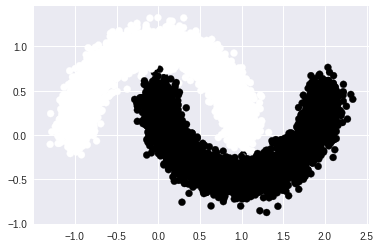

In [3]:
X,y = datasets.make_moons(n_samples=10000, 
                          shuffle=True, 
                          noise=0.1, 
                          random_state=1234)
Y = np.reshape(y, (len(y),1))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [ ]:
# class NeuralNetwork(torch.nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.l1 = torch.nn.Linear(2, 3)
#         self.l2 = torch.nn.Linear(3, 3)
#         self.l3 = torch.nn.Linear(3, 1)
#         self.sigmoid = torch.nn.Sigmoid()
    
#     def forward(self, x):
#         out1 = self.sigmoid(self.l1(x))
#         out2 = self.sigmoid(self.l2(out1))
#         out3 = self.sigmoid(self.l3(out2))
#         return out3   


In [1]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.l1 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out3 = self.sigmoid(self.l1(x))
        return out3   


NameError: name 'torch' is not defined

In [ ]:
model = NeuralNetwork()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
inputs = torch.tensor(X, dtype=torch.float).to(device=device)
labels = torch.tensor(y, dtype=torch.float).to(device=device)

In [ ]:
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
#store all the loss values
losses = []

In [ ]:
for epoch in tqdm(range(10000)):
    y_pred = model(inputs)
    loss = criterion(y_pred, labels)
    losses.append(loss)
    if not epoch%500: print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
plt.plot(losses)

In [ ]:
test = torch.randn(1,2, dtype=torch.float).to(device=device)
print(model.forward(test))
test2 = test.cpu().numpy()
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(test2[0][0], test2[0][1],c='red')
plt.show()